In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import databuilder
import matplotlib.dates as mdates

# Load all data
db  = databuilder

# Load the ergency dataset and display the first few rows
emergency_df = db.get_emergency_data()
display(emergency_df.head())

# Load the full moon data and display the first few rows
full_moon_df = db.get_full_moon_data()
display(full_moon_df.head())

Loading ./Resources/COS2019.csv
Successfully loaded data for ./Resources/COS2019.csv
Loading ./Resources/COS2020.csv
Successfully loaded data for ./Resources/COS2020.csv
Loading ./Resources/COS2021.csv
Successfully loaded data for ./Resources/COS2021.csv
Loading ./Resources/COS2022.csv
Successfully loaded data for ./Resources/COS2022.csv
Loading ./Resources/COS2023.csv
Successfully loaded data for ./Resources/COS2023.csv

Successfully combined 5 files
Total records: 1,150,331


,INCIDENT,REPORTED,CLOSED,CATEGORY
0,19000004,2019-01-01 00:03:00,2019-01-01 01:22:00,ALS
1,19000006,2019-01-01 00:05:00,2019-01-01 00:29:00,ALS
2,19000008,2019-01-01 00:07:00,2019-01-01 00:20:00,ALS
3,19000011,2019-01-01 00:10:00,2019-01-01 00:23:00,BLS
4,19000013,2019-01-01 00:10:00,2019-01-01 00:36:00,ALS


Loading ./Resources/full_moons.csv
Successfully loaded data for ./Resources/full_moons.csv

Successfully combined 1 files
Total records: 1,868


,Day,Flag,DateTime
0,Monday,Full,2000-01-15 20:07:30
1,Wednesday,Full,2000-02-14 14:50:12
2,Friday,Full,2000-03-16 09:11:48
3,Sunday,Full,2000-04-15 02:02:06
4,Monday,Full,2000-05-14 16:36:36


In [11]:
# Assuming your dataframe is named emergency_df
emergency_df['Reported_Date'] = emergency_df['REPORTED'].dt.date
emergency_df_grouped = emergency_df.groupby('Reported_Date').size().reset_index(name='Count') #Group by date and display count of rows

# Convert REPORTED_DATE back to datetime for easier plotting
emergency_df_grouped['Reported_Date'] = pd.to_datetime(emergency_df_grouped['Reported_Date'])

print(len(emergency_df_grouped))
display(emergency_df_grouped.head())

1826


,Reported_Date,Count
0,2019-01-01,555
1,2019-01-02,621
2,2019-01-03,566
3,2019-01-04,613
4,2019-01-05,538


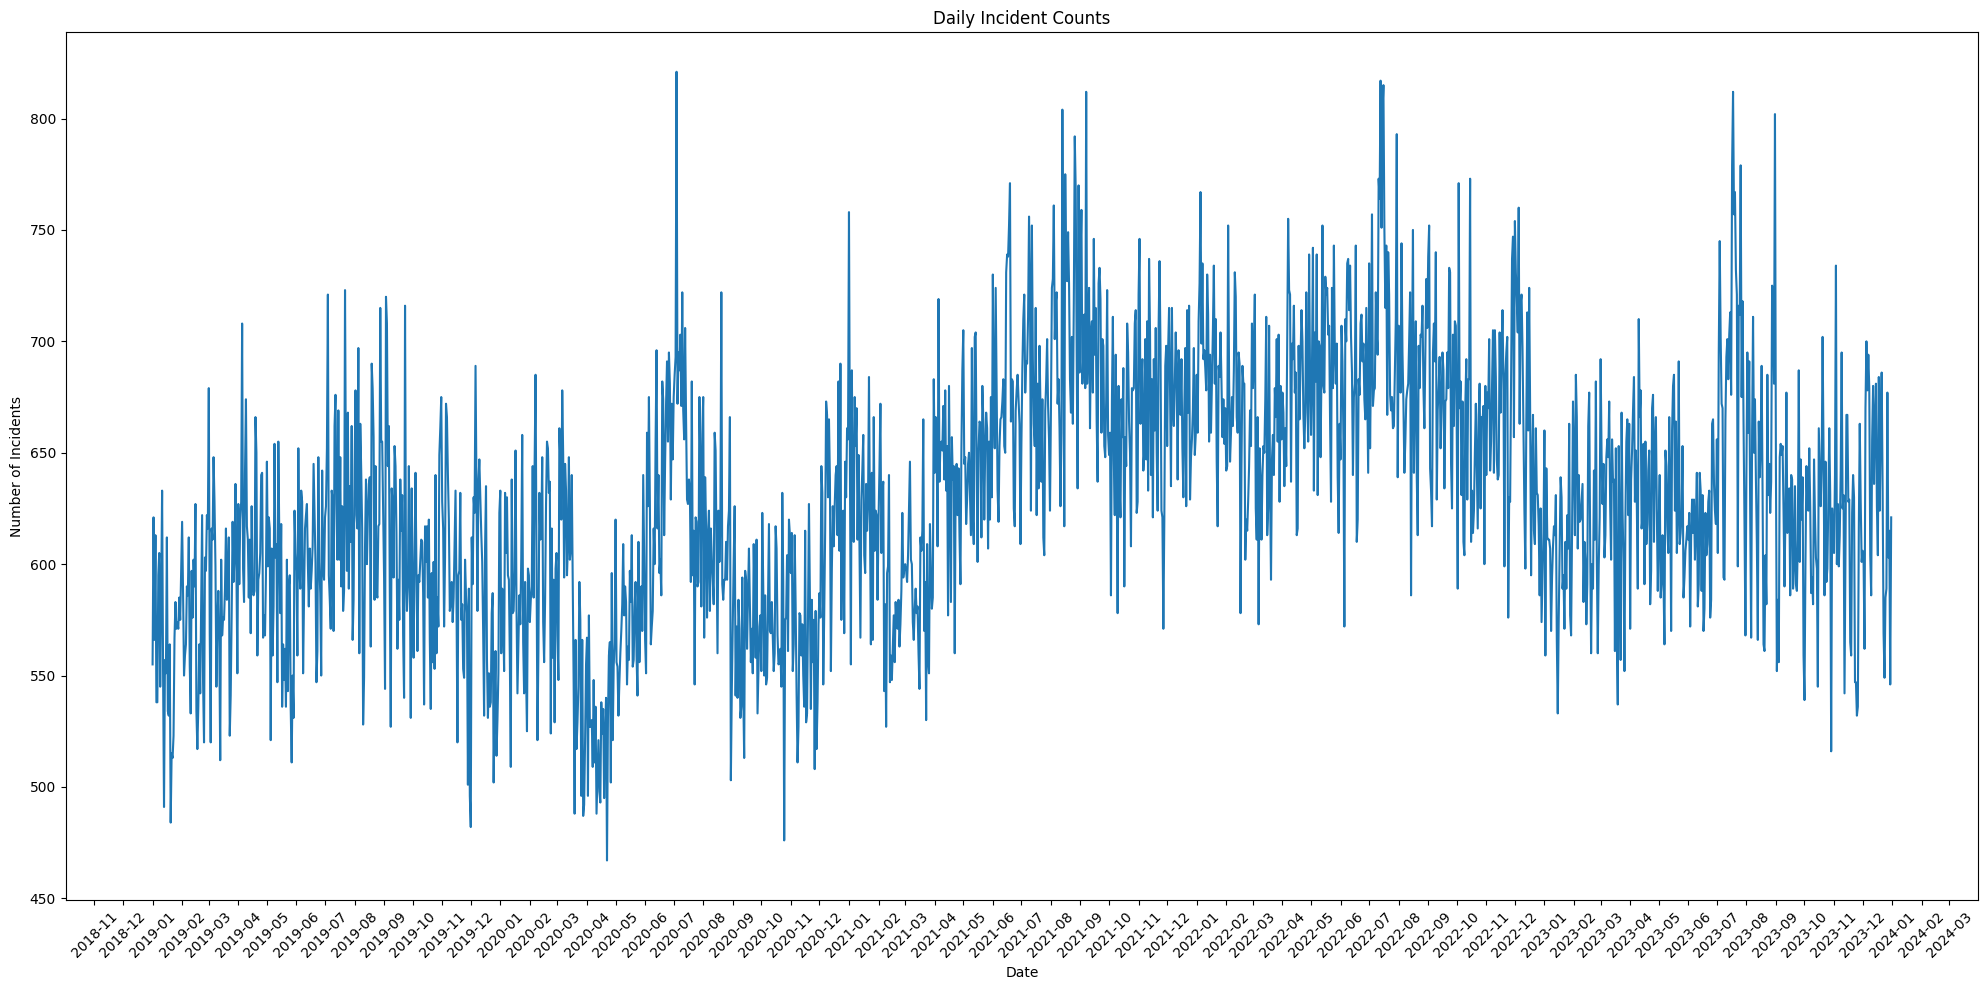

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the incident counts
ax.plot(emergency_df_grouped['Reported_Date'], emergency_df_grouped['Count'])

# Customize the plot
plt.title('Daily Incident Counts')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

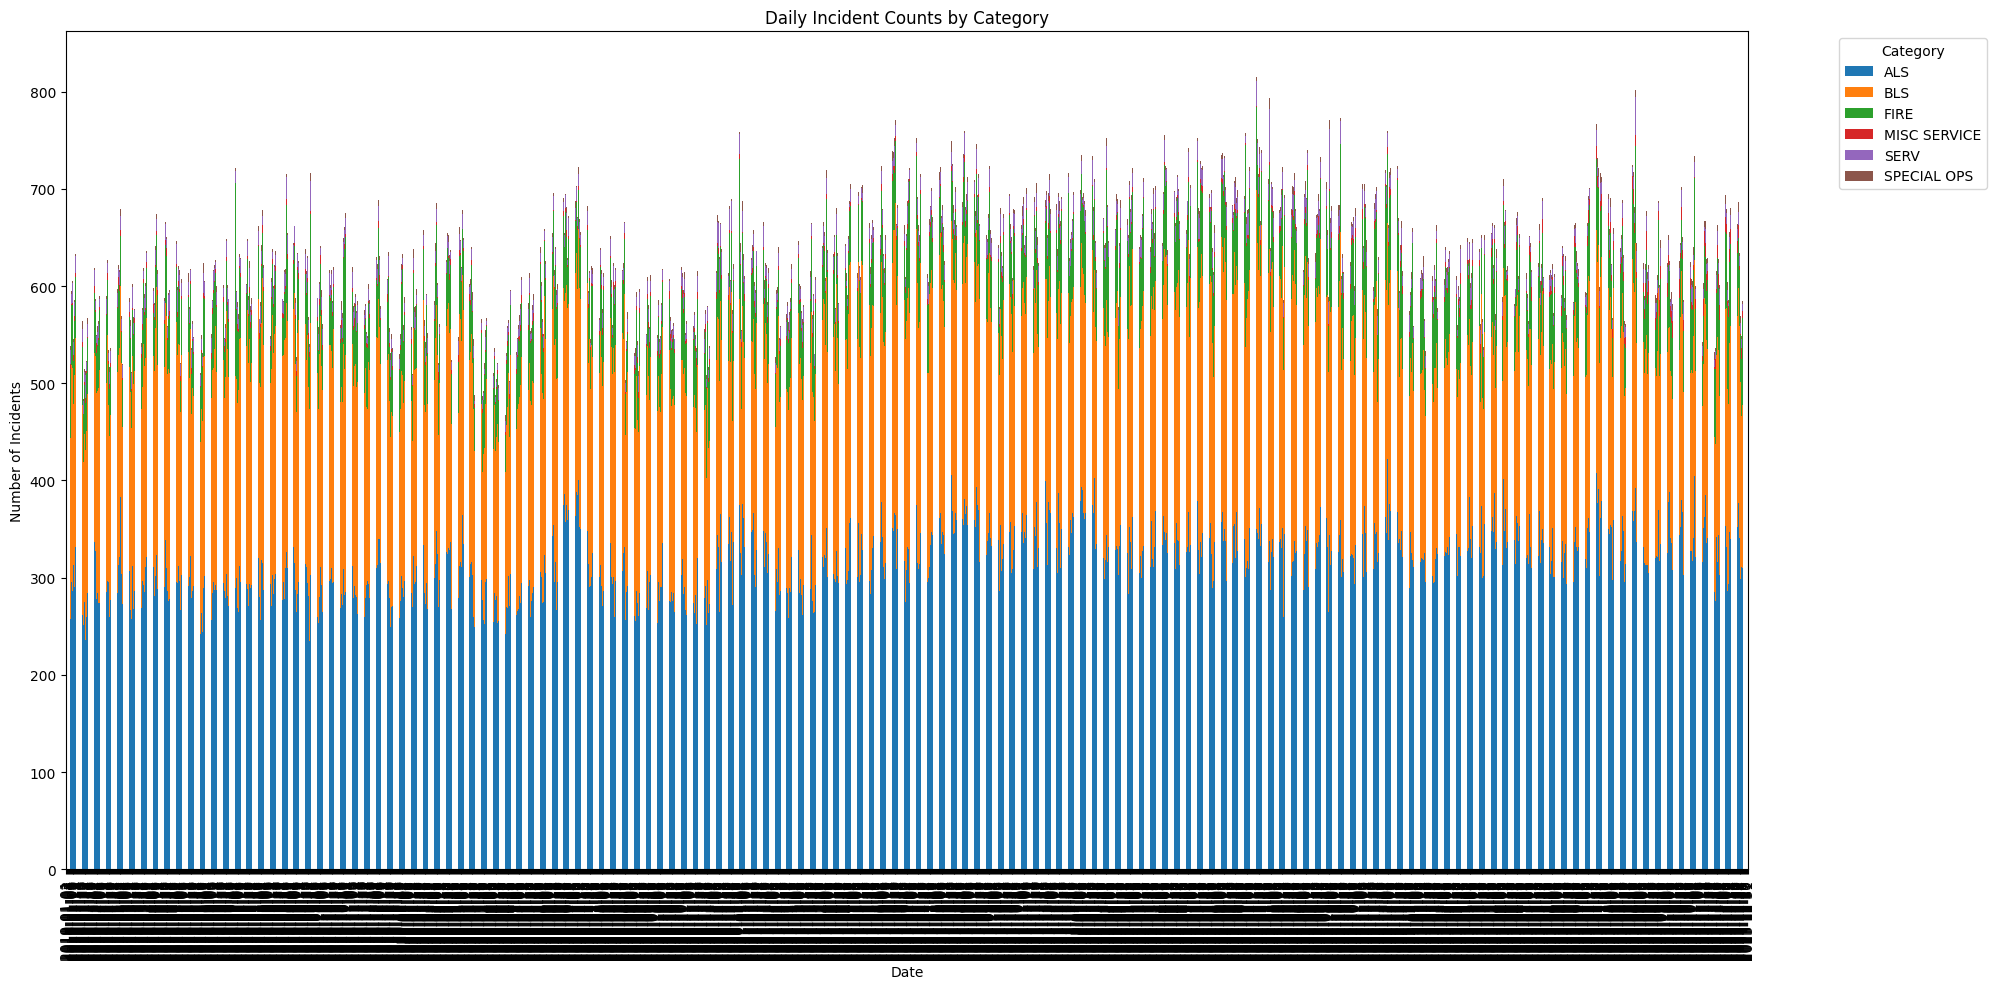

In [13]:
category_counts = emergency_df.groupby(['Reported_Date', 'CATEGORY']).size().unstack(fill_value=0)

# Plot stacked bar chart
category_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Daily Incident Counts by Category')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
print(len(full_moon_df))
print(full_moon_df.columns)
print(full_moon_df.dtypes)
display(full_moon_df)

1868
Index(['Day', 'Flag', 'DateTime'], dtype='object')
Day                 object
Flag                object
DateTime    datetime64[ns]
dtype: object


,Day,Flag,DateTime
0,Monday,Full,2000-01-15 20:07:30
1,Wednesday,Full,2000-02-14 14:50:12
2,Friday,Full,2000-03-16 09:11:48
3,Sunday,Full,2000-04-15 02:02:06
4,Monday,Full,2000-05-14 16:36:36
...,...,...,...
1863,Thursday,Full,2050-09-01 11:30:54
1864,Friday,Blue,2050-09-30 19:31:48
1865,Sunday,Total Eclipse,2050-10-30 04:16:00
1866,Monday,Full,2050-11-28 16:09:48


In [16]:
# Only keep Flag values that are Full
full_moon_simplified_df = full_moon_df[full_moon_df['Flag'] == 'Full']

display(full_moon_simplified_df)

,Day,Flag,DateTime
0,Monday,Full,2000-01-15 20:07:30
1,Wednesday,Full,2000-02-14 14:50:12
2,Friday,Full,2000-03-16 09:11:48
3,Sunday,Full,2000-04-15 02:02:06
4,Monday,Full,2000-05-14 16:36:36
...,...,...,...
1861,Monday,Full,2050-07-04 20:51:00
1862,Wednesday,Full,2050-08-03 04:20:30
1863,Thursday,Full,2050-09-01 11:30:54
1866,Monday,Full,2050-11-28 16:09:48
